<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Statistical Expectation Demonstration

### Using Statistical Expectation to Model the Mathematical Operators with Random Variables Tutorial

* demonstrate various mathematical operations for statistical expectation with distributions

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

#### Statistical Expectation

Defined as a probability weighted average, **statistical expectation** is a powerful concept in statistics. It is used for:

* ANOVA (analysis of variance)
* nested variogram modeling
* trend and residual modeling for nonstationary phenomenon
* decion making (expected net present value)

etc.

To demonstrate statistical expectation the following operators will be demonstrated with random variables, distributions:

* Expectation of a constant $\longrightarrow E\left[c\right] = c$

* Expectation of a random variable + a constant $\longrightarrow E\left[X + c\right] = E\left[X\right] + E\left[c\right] = E\left[X \right] + c$

* Expectation of the addition of two random variables $\longrightarrow E\left[X + Y\right] = E\left[X\right] + E\left[Y\right]$

* Expectation of the product of two random variables $\longrightarrow E\left[XY\right] = E\left[X\right]E\left[Y\right]$, if $X$ and $Y$ are independent

#### Objective 

Now that we have provided the derrivations for adding and subtracting random variables, I provide a example and demonstration with 2 random variables:

* the analytical and emprical result for comparison
* visualization of the univariate and bivariate distributions

#### Getting Started

Here's the steps to get setup in Python:

* Install Anaconda 3 on your machine (https://www.anaconda.com/download/).  

#### Load the Required Libraries

The following code loads the required libraries.

In [1]:
import numpy as np                                                # arrays
import scipy as sp                                                # statistical distributions
import matplotlib.pyplot as plt                                   # plotting
import math                                                       # square root to calculate standard deviation from variance

##### Specify, Sample and Visualize our Random Variables

First we build a simple bivariate distribution for random varibles $X$ and $Y$. 

* we use the bivariate Gaussian distribution for convenience, but the derived equations for entral tendency and dispersion are general for any distribution.

Then we add another uncorrelation random variable, $Z$

We draw $L$ realizations from the bivariate distribution and plot the histograms and scatter plot.

* below I use sample statistic instead of population statistic notation to indicate that calculation is approximative, based on a limited sample size 

For our demonstration:

* all distributions are Gaussian, specified by mean and variance
* X and Y are correlated (specified by covariance)
* X and Y, Y and Z are not correlated

Let's specify, sample and visualize our random variable's distributions.

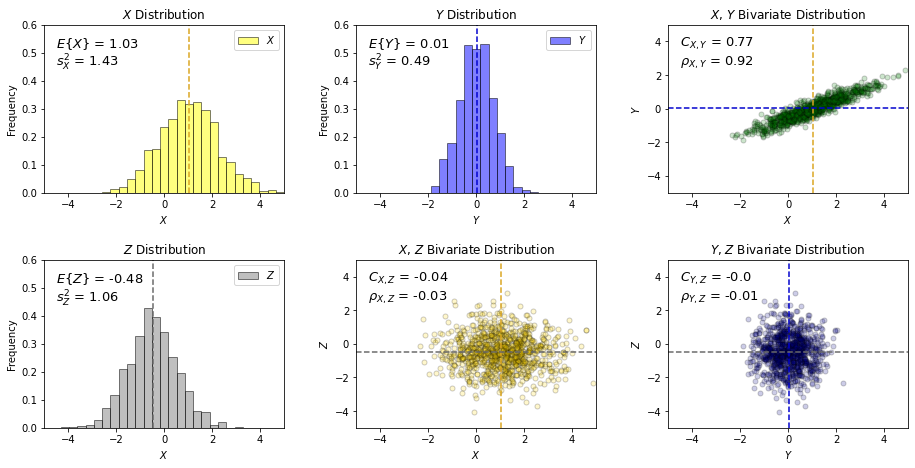

In [9]:
mean_X = 1.0; mean_Y = 0.0; mean_Z = -0.5                         # parameters for distribution
var_X = 1.5; var_Y = 0.5; var_Z = 1.0; cov_XY = 0.8
L = 1000                                                          # number of samples
seed = 13

np.random.seed(seed = seed)                                       # sample the random variables to visualize and check the results
R = np.random.multivariate_normal([mean_X,mean_Y],np.array([[var_X,cov_XY],[cov_XY,var_Y]]),size=L)
X = R[:,0]; Y = R[:,1]
Z = np.random.normal(loc = mean_Z,scale = var_Z,size=L)

xmin = -5; xmax = 5; nbins = 30                                    # histogram plotting parameters

plt.subplot(231)                                                   # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--')
plt.annotate('$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.xlabel('$X$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(232)                                                   # annotated histogram of Y
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='blue',density = True,label='$Y$')
plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--')
plt.annotate('$E\{Y\}$ = ' + str(np.round(np.average(Y),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_Y$ = ' + str(np.round(np.var(Y),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$Y$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(233)                                                   # annotated scatter plot of X and Y
plt.scatter(X,Y,color='green',alpha=0.2,edgecolor='black',s=25)
plt.plot((np.average(X),np.average(X)),(xmin,xmax),color='goldenrod',ls='--'); plt.plot((xmin,xmax),(np.average(Y),np.average(Y)),color='mediumblue',ls='--')
plt.xlim([xmin,xmax]); plt.ylim([xmin,xmax])
plt.annotate(r'$C_{X,Y}$ = ' + str(np.round(np.cov(R,rowvar=False)[0,1],2)),(-4.5,3.7),fontsize = 13)
plt.annotate(r'$\rho_{X,Y}$ = ' + str(np.round(np.corrcoef(R,rowvar=False)[0,1],2)),(-4.5,2.6),fontsize = 13)
plt.xlabel('$X$'); plt.ylabel('$Y$'); plt.title('$X$, $Y$ Bivariate Distribution')

plt.subplot(234)                                                   # annotated histogram of X
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='grey',density = True,label='$Z$')
plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.annotate('$E\{Z\}$ = ' + str(np.round(np.average(Z),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_Z$ = ' + str(np.round(np.var(Z),2)),(-4.5,0.45),fontsize = 13)
plt.xlabel('$X$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$Z$ Distribution')
plt.legend(loc='upper right')

plt.subplot(235)                                                   # annotated scatter plot of X and Y
plt.scatter(X,Z,color='gold',alpha=0.2,edgecolor='black',s=25)
plt.plot((np.average(X),np.average(X)),(xmin,xmax),color='goldenrod',ls='--'); plt.plot((xmin,xmax),(np.average(Z),np.average(Z)),color='dimgrey',ls='--')
plt.xlim([xmin,xmax]); plt.ylim([xmin,xmax])
plt.annotate(r'$C_{X,Z}$ = ' + str(np.round(np.cov(X,Z)[0][1],2)),(-4.5,3.7),fontsize = 13)
plt.annotate(r'$\rho_{X,Z}$ = ' + str(np.round(np.corrcoef(X,Z)[0][1],2)),(-4.5,2.6),fontsize = 13)
plt.xlabel('$X$'); plt.ylabel('$Z$'); plt.title('$X$, $Z$ Bivariate Distribution')

plt.subplot(236)                                                   # annotated scatter plot of X and Y
plt.scatter(Y,Z,color='darkblue',alpha=0.2,edgecolor='black',s=25)
plt.plot((np.average(Y),np.average(Y)),(xmin,xmax),color='mediumblue',ls='--'); plt.plot((xmin,xmax),(np.average(Z),np.average(Z)),color='dimgrey',ls='--')
plt.xlim([xmin,xmax]); plt.ylim([xmin,xmax])
plt.annotate(r'$C_{Y,Z}$ = ' + str(np.round(np.cov(Y,Z)[0][1],2)),(-4.5,3.7),fontsize = 13)
plt.annotate(r'$\rho_{Y,Z}$ = ' + str(np.round(np.corrcoef(Y,Z)[0][1],2)),(-4.5,2.6),fontsize = 13)
plt.xlabel('$Y$'); plt.ylabel('$Z$'); plt.title('$Y$, $Z$ Bivariate Distribution')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.3, hspace=0.4); plt.show()

Now we can walk through various operators for random variables with expectation. 

* Focus on the statistical expectation operators (e.g., $E\{X + c\} = E\{X \} + c$)
* When applicable I also show variance relations (e.g., $\sigma^2_{X+c} = \sigma^2_{X}$), these can be derived by expectation, but I have not added the deriviations here for brevity. 

#### Expectation of a random variable + a constant

I demonstrate the following relationship with a random variable, $X$, and a constant, $c$.

\begin{equation}
E\{X + c\} = E\{X\} + E\{c\} = E\{X \} + c
\end{equation}

with expectation it can also be shown that the variance will remain constant with the addition of a constant:

\begin{equation}
\sigma^2_{X+c} = \sigma^2_{X}
\end{equation}


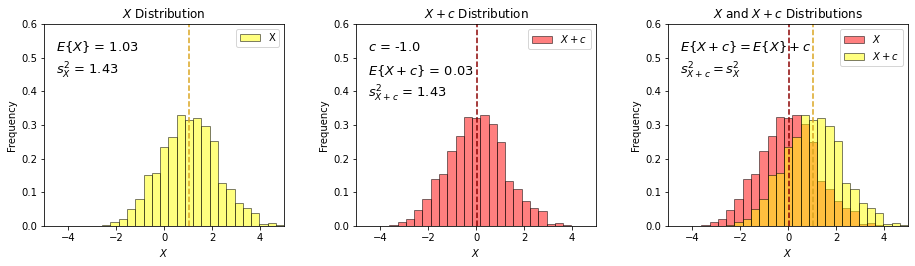

In [3]:
c = -1.0
X1 = X + c

xmin = -5; xmax = 5; nbins = 30                                    # plotting parameters

plt.subplot(131)                                                   # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='X')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--')
plt.annotate('$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.xlabel('$X$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(132)                                                   # annotated histogram of Y
plt.hist(x=X1,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label='$X + c$')
plt.vlines(np.average(X1),0,0.6,color='darkred',ls='--')
plt.annotate('$c$ = ' + str(np.round(c,2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$E\{X+c\}$ = ' + str(np.round(np.average(X1),2)),(-4.5,0.45),fontsize = 13)
plt.annotate('$s^2_{X+c}$ = ' + str(np.round(np.var(X1),2)),(-4.5,0.38),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X + c$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(133)                                                   # annotated histogram of Y
plt.hist(x=X1,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label='$X$')
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X + c$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(X1),0,0.6,color='darkred',ls='--')
plt.annotate('$E\{X+c\} = E\{X\} + c$',(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_{X+c} = s^2_{X}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$ and $X + c$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.7, wspace=0.3, hspace=0.4); plt.show()

Adding a constant shift the random variable's distribution, and does not change the dispersion!

#### Expectation of a product of a random variable and a constant

I demonstrate the following relationship with a random variable, $Y$, and a constant, $c$.

\begin{equation}
E\{cY\} = cE\{Y\}
\end{equation}

with expectation it can also be shown that the variance will scale as:

\begin{equation}
\sigma^2_{cY} = c^2 \sigma^2_{Y}
\end{equation}

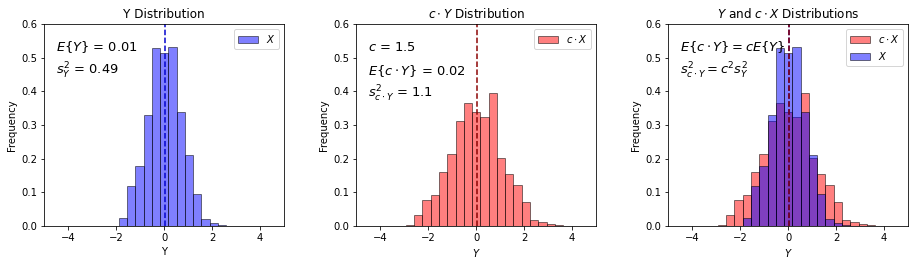

In [4]:
c = 1.5
Y2 = Y * c

xmin = -5; xmax = 5; nbins = 30                                    # plotting parameters

plt.subplot(131)                                                   # annotated histogram of X
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='blue',density = True,label='$X$')
plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--')
plt.annotate('$E\{Y\}$ = ' + str(np.round(np.average(Y),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_Y$ = ' + str(np.round(np.var(Y),2)),(-4.5,0.45),fontsize = 13)
plt.xlabel('Y'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('Y Distribution') 
plt.legend(loc='upper right')

plt.subplot(132)                                                   # annotated histogram of Y
plt.hist(x=Y2,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label='$c \cdot X$')
plt.vlines(np.average(Y2),0,0.6,color='darkred',ls='--')
plt.annotate('$c$ = ' + str(np.round(c,2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$E\{c \cdot Y\}$ = ' + str(np.round(np.average(Y2),2)),(-4.5,0.45),fontsize = 13)
plt.annotate('$s^2_{c \cdot Y}$ = ' + str(np.round(np.var(Y2),2)),(-4.5,0.38),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$c \cdot Y$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(133)                                                   # annotated histogram of Y
plt.hist(x=Y2,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label='$c \cdot X$')
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='blue',density = True,label='$X$')
plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--'); plt.vlines(np.average(Y2),0,0.6,color='darkred',ls='--')
plt.annotate('$E\{c \cdot Y\} = cE\{Y\}$',(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_{c \cdot Y} = c^2 s^2_{Y}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$Y$ and $c \cdot X$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.7, wspace=0.3, hspace=0.4); plt.show()

if the original mean is 0, then the only result is for the variance to change, stretch or squeeze by a factor of $c^2$. The mean remains almost 0.0:

\begin{equation}
E\{cY\} = cE\{Y\}
\end{equation}

if $E\{Y\} = 0.0$, then $cE\{Y\} = 0$, regardless of $c$.

Let's repeat this with a random variable with a expectation not equal to 0.0, i.e., random variable, $X$, $E\{X\} \ne 0.0$ and a constant, $c$.

\begin{equation}
E\{cX\} = cE\{X\}
\end{equation}

once again, with expectation it can be shown that the variance will scale as:

\begin{equation}
\sigma^2_{cX} = c^2 \sigma^2_{X}
\end{equation}

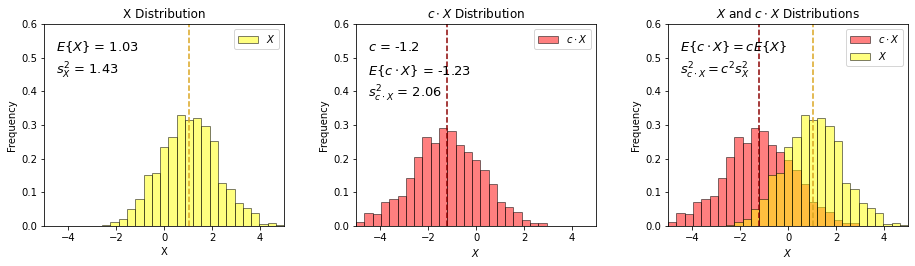

In [5]:
c = -1.2
X2 = X * c

xmin = -5; xmax = 5; nbins = 30                                    # plotting parameters

plt.subplot(131)                                                   # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--')
plt.annotate('$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.xlabel('X'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('X Distribution') 
plt.legend(loc='upper right')

plt.subplot(132)                                                   # annotated histogram of Y
plt.hist(x=X2,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label='$c \cdot X$')
plt.vlines(np.average(X2),0,0.6,color='darkred',ls='--')
plt.annotate('$c$ = ' + str(np.round(c,2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$E\{c \cdot X\}$ = ' + str(np.round(np.average(X2),2)),(-4.5,0.45),fontsize = 13)
plt.annotate('$s^2_{c \cdot X}$ = ' + str(np.round(np.var(X2),2)),(-4.5,0.38),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$c \cdot X$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(133)                                                   # annotated histogram of Y
plt.hist(x=X2,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label='$c \cdot X$')
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(X2),0,0.6,color='darkred',ls='--')
plt.annotate('$E\{c \cdot X\} = cE\{X\}$',(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_{c \cdot X} = c^2 s^2_{X}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$ and $c \cdot X$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.7, wspace=0.3, hspace=0.4); plt.show()

The constant scales the distribution, stretches or squeezes the distribution and shifts the expectation by $cE\{X\}$.

#### Expectation of the addition of two random variables

I demonstrate the following relationship for the addition of two random variables, $X$, and , $Y$.

\begin{equation}
E\{X + Y\} = E\{X\} + E\{Y\}
\end{equation}

with expectation it can also be shown that the resulting variance will be:

\begin{equation}
\sigma^2_{X+Y} = \sigma^2_X + \sigma^2_Y + 2 \cdot C_{X,Y}
\end{equation}

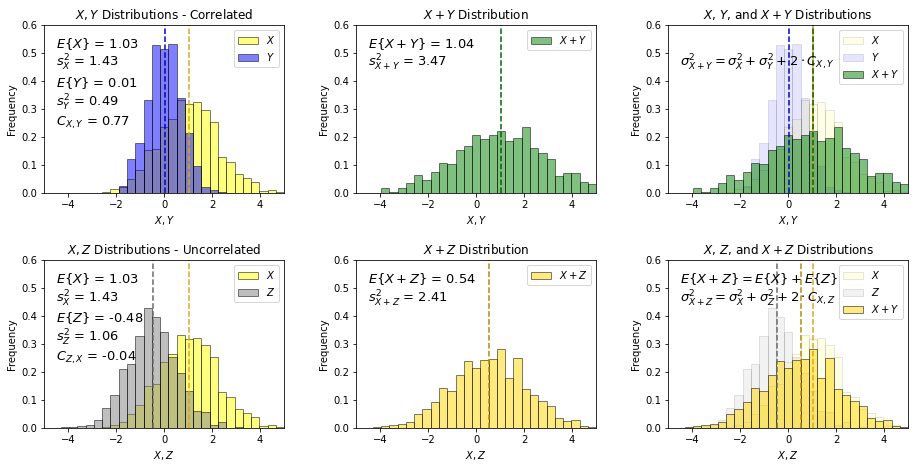

In [6]:
XY = X + Y                                                          # add 2 random variables
XZ = Z + X

xmin = -5; xmax = 5; nbins = 30                                    # plotting parameters

plt.subplot(231)                                                   # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='blue',density = True,label='$Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--')
plt.annotate('$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.annotate('$E\{Y\}$ = ' + str(np.round(np.average(Y),2)),(-4.5,0.38),fontsize = 13)
plt.annotate('$s^2_{Y}$ = ' + str(np.round(np.var(Y),2)),(-4.5,0.31),fontsize = 13)
plt.annotate(r'$C_{X,Y}$ = ' + str(np.round(np.cov(R,rowvar=False)[0,1],2)),(-4.5,0.24),fontsize = 13)
plt.xlabel('$X, Y$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X, Y$ Distributions - Correlated') 
plt.legend(loc='upper right')

plt.subplot(232)                                                   # annotated histogram of Y
plt.hist(x=XY,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='green',density = True,label='$X + Y$')
plt.vlines(np.average(XY),0,0.6,color='darkgreen',ls='--')
plt.annotate('$E\{X + Y\}$ = ' + str(np.round(np.average(XY),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_{X + Y}$ = ' + str(np.round(np.var(XY),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X, Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X + Y$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(233)                                                   # annotated histogram of Y
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='blue',density = True,label='$Y$')
plt.hist(x=XY,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='green',density = True,label='$X + Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod'); plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--');
plt.vlines(np.average(XY),0,0.6,color='darkgreen',ls='--')
plt.annotate('$\sigma^2_{X+Y} = \sigma^2_X + \sigma^2_Y + 2 \cdot C_{X,Y}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X,Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Y$, and $X + Y$ Distributions') 
plt.legend(loc='upper right')

plt.subplot(234)                                                   # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='grey',density = True,label='$Z$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.annotate('$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.annotate('$E\{Z\}$ = ' + str(np.round(np.average(Z),2)),(-4.5,0.38),fontsize = 13)
plt.annotate('$s^2_{Z}$ = ' + str(np.round(np.var(Z),2)),(-4.5,0.31),fontsize = 13)
plt.annotate(r'$C_{Z,X}$ = ' + str(np.round(np.cov(X,Z)[0][1],2)),(-4.5,0.24),fontsize = 13)
plt.xlabel('$X,Z$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X, Z$ Distributions - Uncorrelated') 
plt.legend(loc='upper right')

plt.subplot(235)                                                   # annotated histogram of Y
plt.hist(x=XZ,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='$X + Z$')
plt.vlines(np.average(XZ),0,0.6,color='darkgoldenrod',ls='--')
plt.annotate('$E\{X + Z\}$ = ' + str(np.round(np.average(XZ),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_{X + Z}$ = ' + str(np.round(np.var(XZ),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X, Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X + Z$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(236)                                                   # annotated histogram of Y
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='grey',density = True,label='$Z$')
plt.hist(x=XZ,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='$X + Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--');
plt.vlines(np.average(XZ),0,0.6,color='darkgoldenrod',ls='--');
plt.annotate('$E\{X + Z\} = E\{X\} + E\{Z\}$',(-4.5,0.52),fontsize = 13)
plt.annotate('$\sigma^2_{X + Z} = \sigma^2_X + \sigma^2_Z + 2 \cdot C_{X,Z}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X,Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Z$, and $X + Z$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.3, hspace=0.4); plt.show()

The expected values for both cases are additive, this is general and holds if the random variables are correlated (e.g., $X$ and $Y$) or uncorrelated (e.g., $Z$ and $Y$).

Also the variances are additive, the only difference is that we have to include the covaraince term, $2 \cdot C_{X,Y}$, if there is correlation. 

That was addition of random variables, what about subtraction of random variables?

#### Expectation of the subtraction of two random variables

I demonstrate the following relationship for the addition of two random variables, $X$, and , $Y$.

\begin{equation}
E\{X - Y\} = E\{X\} - E\{Y\}
\end{equation}

with expectation it can also be shown that the resulting variance will be:

\begin{equation}
\sigma^2_{X-Y} = \sigma^2_X + \sigma^2_Y - 2 \cdot C_{X,Y} 
\end{equation}

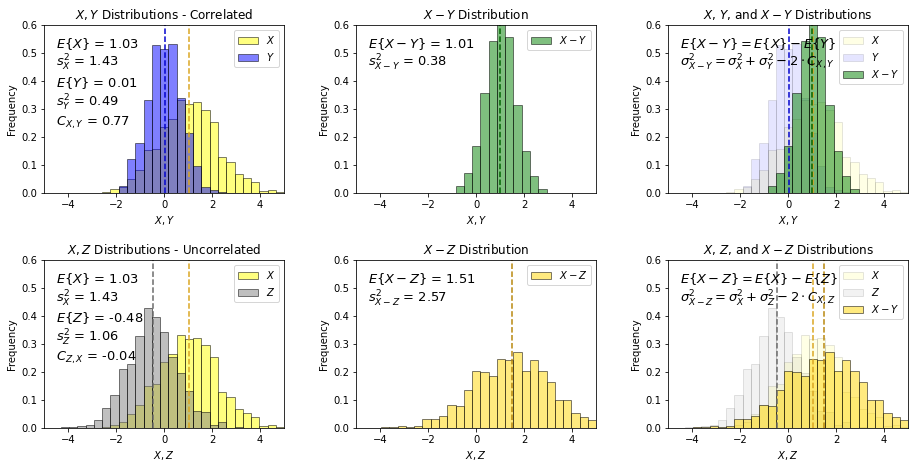

In [7]:
XY6 = X - Y                                                        # subtract 2 random variables
XZ6 = X - Z

xmin = -5; xmax = 5; nbins = 30                                    # plotting parameters

plt.subplot(231)                                                   # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='blue',density = True,label='$Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--')
plt.annotate('$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.annotate('$E\{Y\}$ = ' + str(np.round(np.average(Y),2)),(-4.5,0.38),fontsize = 13)
plt.annotate('$s^2_{Y}$ = ' + str(np.round(np.var(Y),2)),(-4.5,0.31),fontsize = 13)
plt.annotate(r'$C_{X,Y}$ = ' + str(np.round(np.cov(R,rowvar=False)[0,1],2)),(-4.5,0.24),fontsize = 13)
plt.xlabel('$X, Y$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X, Y$ Distributions - Correlated') 
plt.legend(loc='upper right')

plt.subplot(232)                                                   # annotated histogram of Y
plt.hist(x=XY6,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='green',density = True,label='$X - Y$')
plt.vlines(np.average(XY6),0,0.6,color='darkgreen',ls='--')
plt.annotate('$E\{X - Y\}$ = ' + str(np.round(np.average(XY6),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_{X - Y}$ = ' + str(np.round(np.var(XY6),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X, Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X - Y$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(233)                                                   # annotated histogram of Y
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='blue',density = True,label='$Y$')
plt.hist(x=XY6,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='green',density = True,label='$X - Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--')
plt.vlines(np.average(XY6),0,0.6,color='darkgreen',ls='--')
plt.annotate('$E\{X - Y\} = E\{X\} - E\{Y\}$',(-4.5,0.52),fontsize = 13)
plt.annotate('$\sigma^2_{X - Y} = \sigma^2_X + \sigma^2_Y - 2 \cdot C_{X,Y}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X,Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Y$, and $X - Y$ Distributions') 
plt.legend(loc='upper right')

plt.subplot(234)                                                   # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='grey',density = True,label='$Z$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.annotate('$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.annotate('$E\{Z\}$ = ' + str(np.round(np.average(Z),2)),(-4.5,0.38),fontsize = 13)
plt.annotate('$s^2_{Z}$ = ' + str(np.round(np.var(Z),2)),(-4.5,0.31),fontsize = 13)
plt.annotate(r'$C_{Z,X}$ = ' + str(np.round(np.cov(X,Z)[0][1],2)),(-4.5,0.24),fontsize = 13)
plt.xlabel('$X,Z$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X, Z$ Distributions - Uncorrelated') 
plt.legend(loc='upper right')

plt.subplot(235)                                                   # annotated histogram of Y
plt.hist(x=XZ6,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='$X - Z$')
plt.vlines(np.average(XZ6),0,0.6,color='darkgoldenrod',ls='--')
plt.annotate('$E\{X - Z\}$ = ' + str(np.round(np.average(XZ6),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_{X - Z}$ = ' + str(np.round(np.var(XZ6),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X, Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X - Z$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(236)                                                   # annotated histogram of Y
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='grey',density = True,label='$Z$')
plt.hist(x=XZ6,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='$X - Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.vlines(np.average(XZ6),0,0.6,color='darkgoldenrod',ls='--')
plt.annotate('$E\{X - Z\} = E\{X\} - E\{Z\}$',(-4.5,0.52),fontsize = 13)
plt.annotate('$\sigma^2_{X - Z} = \sigma^2_X + \sigma^2_Z - 2 \cdot C_{X,Z}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X,Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Z$, and $X - Z$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.3, hspace=0.4); plt.show()

#### Expectation of the product of two random variables 

I demonstrate the following relationship for the product of two random variables, $X$ and $Z$.

\begin{equation}
E\{XZ\} = E\{X\}E\{Z\}
\end{equation}

Note, I only cover the case for two independent variables as this is required for this relation to hold.

* there may be some departure from the result predicted from the analytical expression due to a small amount of correlation (not quite equal to 0.0).

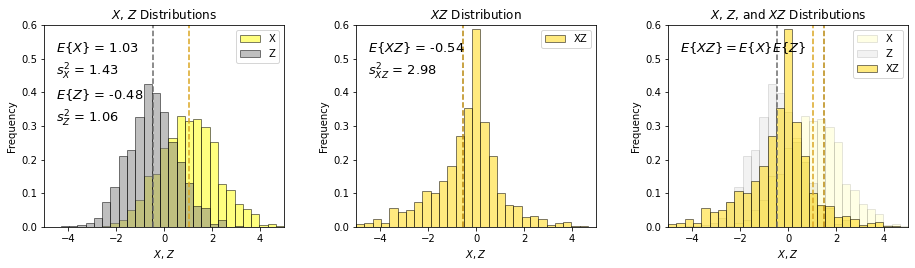

In [8]:
ZX = Z * X                                                         # product of 2 independent random variables

xmin = -5; xmax = 5; nbins = 30                                    # plotting parameters

plt.subplot(131)                                                   # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='X')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='grey',density = True,label='Z')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.annotate('$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.annotate('$E\{Z\}$ = ' + str(np.round(np.average(Z),2)),(-4.5,0.38),fontsize = 13)
plt.annotate('$s^2_{Z}$ = ' + str(np.round(np.var(Z),2)),(-4.5,0.31),fontsize = 13)
plt.xlabel('$X$, $Z$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Z$ Distributions') 
plt.legend(loc='upper right')

plt.subplot(132)                                                   # annotated histogram of Y
plt.hist(x=ZX,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='XZ')
plt.vlines(np.average(ZX),0,0.6,color='darkgoldenrod',ls='--')
plt.annotate('$E\{XZ\}$ = ' + str(np.round(np.average(ZX),2)),(-4.5,0.52),fontsize = 13)
plt.annotate('$s^2_{XZ}$ = ' + str(np.round(np.var(ZX),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X, Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$XZ$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(133)                                                   # annotated histogram of Y
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='yellow',density = True,label='X')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='grey',density = True,label='Z')
plt.hist(x=ZX,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='XZ')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.vlines(np.average(XZ6),0,0.6,color='darkgoldenrod',ls='--')
plt.annotate('$E\{XZ\} = E\{X\}E\{Z\}$',(-4.5,0.52),fontsize = 13)

plt.xlim([xmin,xmax]); plt.xlabel('$X,Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Z$, and $XZ$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.7, wspace=0.3, hspace=0.4); plt.show()

#### Comments

This was a basic demonstration of statistical expectation operators. This concept is useful for many uncertainty modeling workflows, data science proofs, optimum decision making, etc., doing math with distributions!  

Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, geostatistics, machine learning and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)